In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets, https://goo.gl/U2Uwz2
df = pd.read_csv('/Users/subasrees/Desktop/ML_Udemy/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cancer_tumor_data_features.csv')
df_cancer=pd.DataFrame(df)
print(len(df_cancer.columns))

30


In [3]:
data=df_cancer
print(data)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [4]:
#scaler = StandardScaler()
#scaled_X = scaler.fit_transform(data)
#print(scaled_X)

In [5]:
scaled_data = preprocessing.scale(data)
print(scaled_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [6]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
print(pca_data)

[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ... -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ...  3.26241827e-02
  -5.68742432e-03 -1.86787626e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ...  4.70258247e-02
   3.14589659e-03  7.50534755e-04]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ... -2.57775589e-03
   6.70621179e-03  3.77041667e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ... -6.80863833e-02
  -8.41632764e-02 -2.37828222e-02]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ... -9.51587894e-03
  -6.09131090e-02 -1.94755854e-02]]


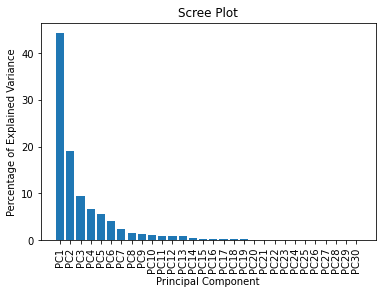

In [7]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=90)
plt.show()

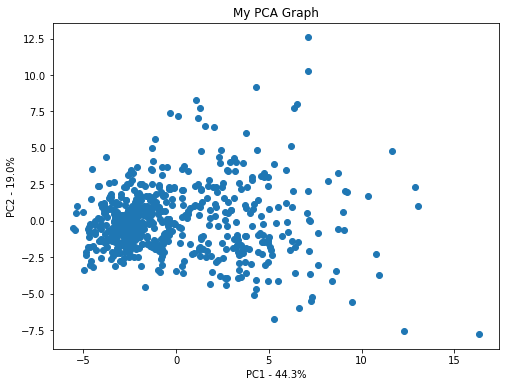

In [8]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=data.index, columns=labels)
plt.figure(figsize=(8,6))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [9]:
loading_scores = pd.Series(pca.components_[0], index=data.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 features
top_10_features = sorted_loading_scores[0:10].index.values
 
## print the feature names and their scores (and +/- sign)
print(loading_scores[top_10_features])

mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
worst concavity         0.228768
worst radius            0.227997
mean perimeter          0.227537
worst area              0.224871
mean area               0.220995
dtype: float64


In [10]:
from sklearn.datasets import load_breast_cancer
cancer_dictionary = load_breast_cancer()
cancer_dictionary.keys()
cancer_dictionary['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Text(0, 0.5, 'Second Principal Component')

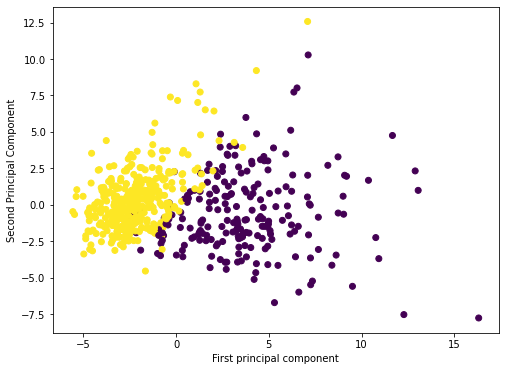

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df.iloc[:,0],pca_df.iloc[:,1],c=cancer_dictionary['target'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')